In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [220]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [205]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [206]:
replace_dict = {"yes": 1, "no": 0}
replace_sex = {"female": 1, "male": 2}
replace_region = {'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}
data['smoker'] = data['smoker'].replace(replace_dict)
data['sex'] = data['sex'].replace(replace_sex)
data['region'] = data['region'].replace(replace_region)


<Axes: >

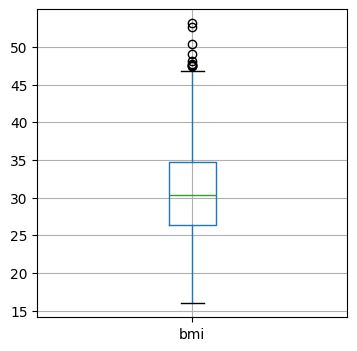

In [207]:
data.boxplot(column=['bmi'], figsize=(4,4))

In [208]:
outlier = data[data['bmi'] > 46].index
df = data.drop(outlier, axis=0)
#удалим выбросы 

<Axes: >

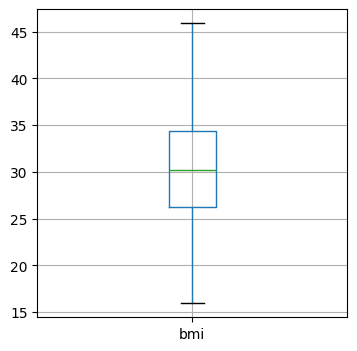

In [209]:
df.boxplot(column=['bmi'],figsize=(4,4))

<Axes: >

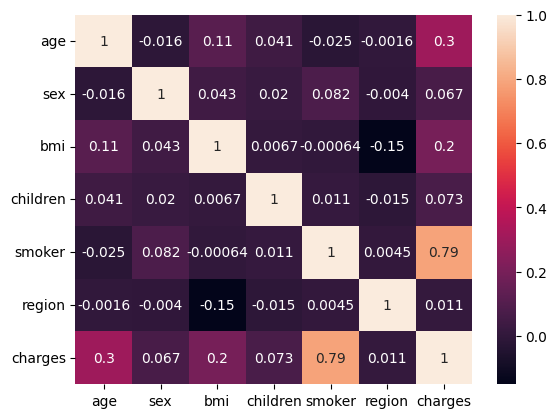

In [264]:
sns.heatmap(df.corr(), annot=True) 

Наблюдаем высокую корреляцию между charges и smoker и charges и children

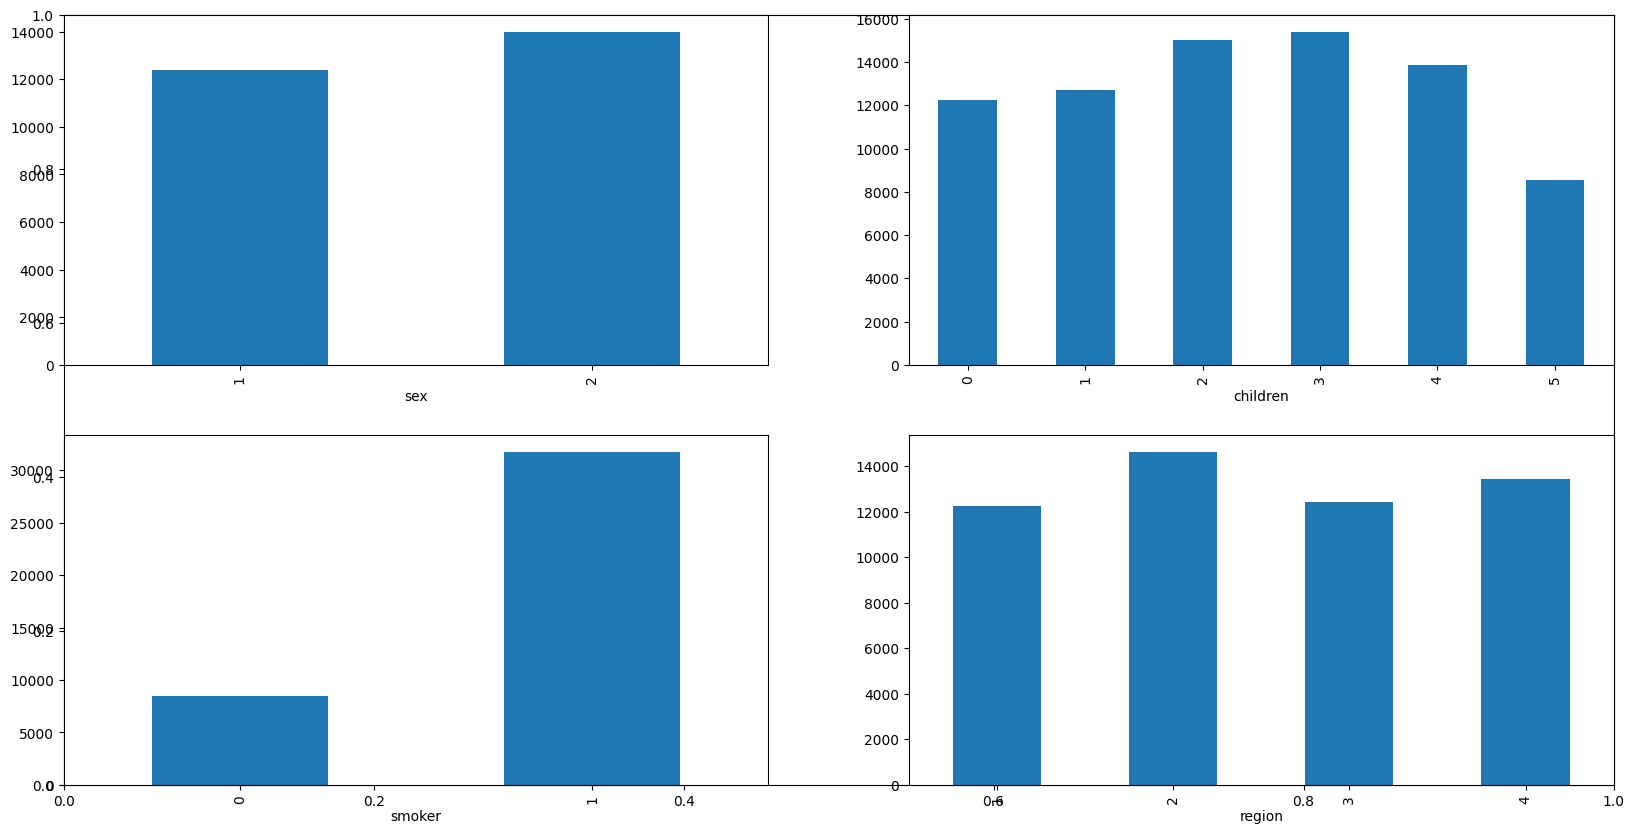

In [254]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Видим, что если человек курящий, то charges больше, также среди мужчин charges больше;

Среди регионов charges примерно одинаковые;

По количеству детей charges больше там, где значения 2-4

<Axes: xlabel='age', ylabel='charges'>

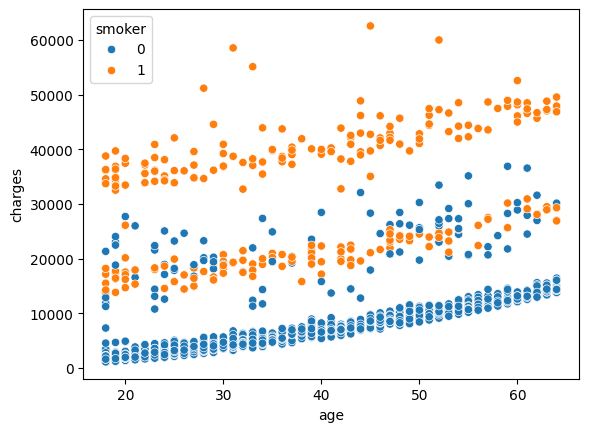

In [260]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

Вместе с возрастом растут charges

In [213]:
X=df.drop(columns=["charges"]) #features
X = X.to_numpy()
y=df['charges'] #target
y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [265]:
class MyLinearRegression:

    def __init__(self, learning_rate = 0.000002, epochs=20000):
        
        self.learning_rate = learning_rate
        self.epochs= epochs 
        self.weights = None
        self.bias = None
        self.loss = []

    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def fit(self, X, y):
        #инициализация весов и bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range (self.epochs):
            #линейное уравнение 
            y_pred=np.dot(X, self.weights)+self.bias

            #расчет ошибки 
            loss = self.mean_squared_error(y, y_pred)
            self.loss.append(loss)

            #производные 
            der_w = (1 / X.shape[1]) * (2 * np.dot(X.T, (y_pred-y)))
            der_b = (1 / X.shape[1]) * (2 * np.sum(y_pred-y))

            #обновление весов и bias 
            self.weights = self.weights - self.learning_rate * der_w
            self.bias = self.bias - self.learning_rate * der_b
            
            #вывод ошибки
            if (i + 1) % 1000 == 0:
                print(f'Epoch [{i + 1}/{self.epochs}], Loss: {loss}') 

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Epoch [1000/20000], Loss: 104340814.75144802
Epoch [2000/20000], Loss: 91071055.32623114
Epoch [3000/20000], Loss: 80478904.60516831
Epoch [4000/20000], Loss: 71994837.90344906
Epoch [5000/20000], Loss: 65187985.33305684
Epoch [6000/20000], Loss: 59719467.12468973
Epoch [7000/20000], Loss: 55320628.67855699
Epoch [8000/20000], Loss: 51777826.76942594
Epoch [9000/20000], Loss: 48920811.4342049
Epoch [10000/20000], Loss: 46613687.78363588
Epoch [11000/20000], Loss: 44747835.896385826
Epoch [12000/20000], Loss: 43236338.99071716
Epoch [13000/20000], Loss: 42009582.26576156
Epoch [14000/20000], Loss: 41011765.669478215
Epoch [15000/20000], Loss: 40198133.65293276
Epoch [16000/20000], Loss: 39532769.75057301
Epoch [17000/20000], Loss: 38986837.68498392
Epoch [18000/20000], Loss: 38537176.51759316
Epoch [19000/20000], Loss: 38165177.21431828
Epoch [20000/20000], Loss: 37855883.35534064


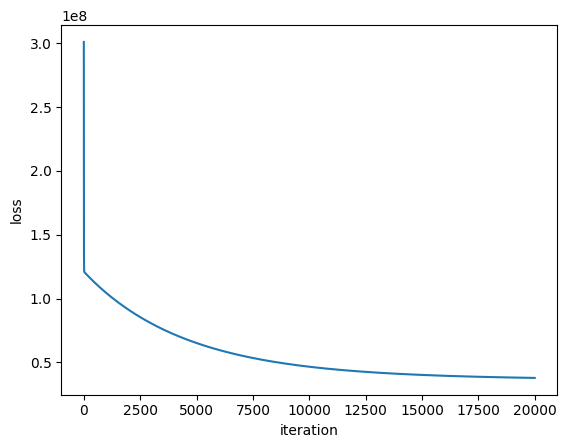

In [266]:
model = MyLinearRegression()
model.fit(X_train, y_train)

xs = np.arange(len(model.loss))
ys = model.loss
plt.plot(xs, ys)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Значение MSE большое, но дальше не уменьшается :(

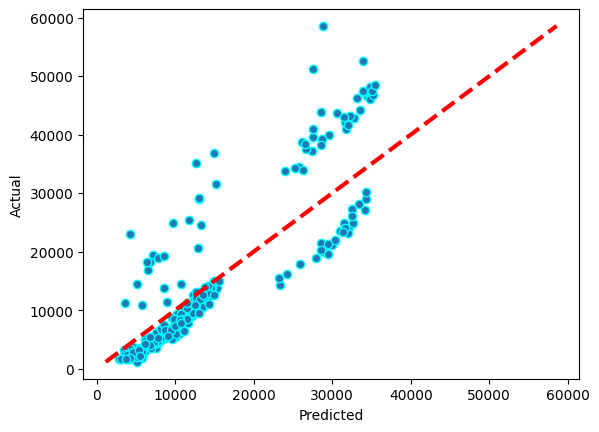

In [267]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Сравним с sklearn

In [245]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Mean squared error (MSE):{mean_squared_error(y_test, y_pred)}')


Mean squared error (MSE):40973793.52250138


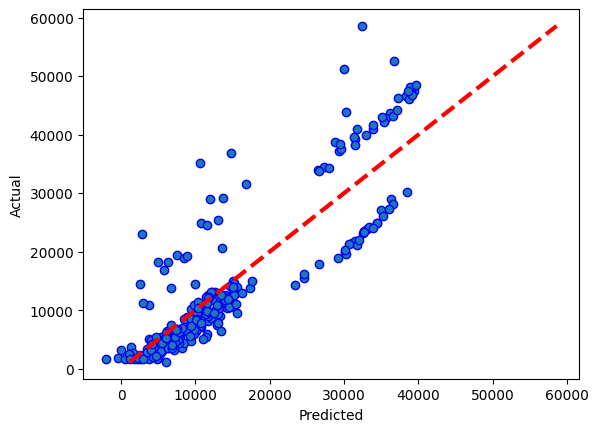

In [246]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()